## Duplicate Payments Analysis

#### Payments of the identical amount to the same vendor on the same day could be indications of duplicate payments.  As a former auditor, this was something I examined for and specifically made selections from while conducing audit testwork.  As an exercies using Python I'm interested in seeing which vendors received the largest amount of duplicate payments by the City of Scottsdale, as well as explore other ways of tweaking this analysis to identify duplicate payments.

#### 1.  Does it seem reasonable that some vendors are receiving identical payments on the same day?  
##### This does seem reasonable in cases where payments are coming from different cost centers.  For instance, some cost centers are receiving goods and services at the same time.  It makes ense that payments to those vendors would be broken out to that level of detail.
#### 2.  Are some Cost Centers or Accounts associated with higher volumes of payments that might be duplicate?  
#### 3.  Are certain days of the week more often associated with higher volume of payments that might be duplicate?

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
pd.set_option('display.max_columns', None)

In [47]:
vendor_payments = pd.read_csv('data/ct_VendorPayments.csv')

In [171]:
vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Concat,Concat2
0,2017-08-14,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2,A TO Z EQUIPMENT RENTAL & SALES _...,A TO Z EQUIPMENT RENTAL & SALES _...
1,2017-08-14,AIMS PVIC,380.00,100,GENERAL,25411,IRRIGATION REPAIR,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,AIMS PVIC _...,AIMS PVIC _...
2,2017-08-14,AIMS PVIC,2125.00,200,TRANSPORTATION,20810,GRADING AND DRAINAGE,52390,MISC MAINTENANCE AND REPAIR,2018,2,AIMS PVIC _...,AIMS PVIC _...
3,2017-08-14,AIMS PVIC,15658.03,603,WATER RECLAMATION,29321,SEWER SYSTEM,52190,OTHER PROFESSIONAL SERVICES,2018,2,AIMS PVIC _...,AIMS PVIC _...
4,2017-08-14,ALL CITY TOWING,583.00,700,FLEET MANAGEMENT,20706,FLEET MANAGEMENT OPERATIONS,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,ALL CITY TOWING _...,ALL CITY TOWING _...


In [73]:
vendor_payments.shape

(23612, 12)

In [27]:
vendor_payments.dtypes

PaymentDate         datetime64[ns]
VendorName                  object
PaymentAmount              float64
Fund                         int64
FundDescription             object
Center                      object
CenterName                  object
Account                      int64
AccountName                 object
FiscalYear                   int64
AccountingPeriod             int64
Concat                      object
dtype: object

In [50]:
# change "payment date" column to datetime format
vendor_payments['PaymentDate'] = pd.to_datetime(vendor_payments['PaymentDate'])

In [51]:
# concatenate values to find idential payments on the same day to the same vendor
vendor_payments['Concat'] = vendor_payments['VendorName'] + \
    '_' + \
    vendor_payments['PaymentAmount'].apply(str) + \
    '_' + \
    vendor_payments['PaymentDate'].apply(str)

In [181]:
# how frequent are payments that appear duplicate?

vendor_payments['Concat'].value_counts().head(10)

SHI INTERNATIONAL CORP                       _822.58_2017-08-29 00:00:00     8
AMERICAN PUBLIC WORKS ASSOC                  _170.25_2017-12-20 00:00:00     7
HP INC                                       _426.06_2018-04-18 00:00:00     7
SERVICE ASSOCIATES                           _64.65_2018-03-12 00:00:00      5
EDUCATION & TRAINING SERVICES LLC            _499.0_2018-07-19 00:00:00      5
SERVICE ASSOCIATES                           _24.99_2018-06-14 00:00:00      5
HP INC                                       _1513.86_2017-12-04 00:00:00    4
SOUTHWEST WATER TREATMENT LLC                _367.5_2018-03-09 00:00:00      4
SOUTHWEST WATER TREATMENT LLC                _367.5_2017-08-18 00:00:00      4
SHI INTERNATIONAL CORP                       _105.79_2018-05-04 00:00:00     3
Name: Concat, dtype: int64

In [144]:
# find count for each concat combination in a format to join
# with filtered dataframe below including only payments of at least two

vendor_payments.groupby('Concat')['PaymentAmount'].count().to_frame().reset_index().rename(columns={'PaymentAmount': 'Count'}).head()

,Concat,Count
0,1 800 RADIATOR _...,1
1,1 800 RADIATOR _...,1
2,1 800 RADIATOR _...,1
3,1 800 RADIATOR _...,1
4,1 800 RADIATOR _...,1


In [150]:
# filter for only identical payments based on concatentation above
greater_than_one = vendor_payments \
    .groupby(['Concat']) \
    .filter(lambda x: x['Concat'].count() > 1)

greater_than_one.shape

(672, 12)

In [113]:
# glance at the duplicate payment data
# it looks like most of these are payments of the same about, to the same vendor
# however there are differences, for instance cost center, or fund
# it looks like some vendors provide services to multiple areas
# the appearance of duplicate payments is simply the porcess of splitting payments 
# out based on the area of the city the product or service was rendered to.

greater_than_one.head(10)

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Concat
93,2017-08-14,WELLS FARGO,3853.59,603,WATER RECLAMATION,23582,REMITTANCE PROCESSING-WTR RECLAMATN,52165,BANKING SERVICES,2018,2,WELLS FARGO _...
95,2017-08-14,WELLS FARGO,3853.59,650,SOLID WASTE MANAGEMENT,23583,REMITTANCE PROCESSING-SOLID WST,52165,BANKING SERVICES,2018,2,WELLS FARGO _...
300,2017-08-18,HEALYS RED WING SHOE STORES,150.00,200,TRANSPORTATION,20800,STREET OPERATIONS ADMINISTRATION,53050,CLOTHING & PERSONAL PROTECT EQUIP,2018,2,HEALYS RED WING SHOE STORES _...
305,2017-08-18,HEALYS RED WING SHOE STORES,150.00,650,SOLID WASTE MANAGEMENT,20552,FRONT LOAD SERVICE-COMM,53050,CLOTHING & PERSONAL PROTECT EQUIP,2018,2,HEALYS RED WING SHOE STORES _...
311,2017-08-18,HOLLY STREET STUDIO LLC,3096.06,400,CIP GENERAL,DC01A,CIVIC CENTER MALL RENOVATIONS,56049,DSGN - ARCHITECTURAL SERVICES,2018,2,HOLLY STREET STUDIO LLC _...
312,2017-08-18,HOLLY STREET STUDIO LLC,3096.06,409,CIP TOURISM DEVELOPMENT,DC01B,CIVIC CENTER MALL RENOVATIONS,56049,DSGN - ARCHITECTURAL SERVICES,2018,2,HOLLY STREET STUDIO LLC _...
370,2017-08-18,SOUTHWEST WATER TREATMENT LLC,367.50,600,WATER,29221,CAP TREATMENT PLANT,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,SOUTHWEST WATER TREATMENT LLC _...
371,2017-08-18,SOUTHWEST WATER TREATMENT LLC,367.50,600,WATER,29260,CHAPARRAL WATER TREATMENT PLANT,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,SOUTHWEST WATER TREATMENT LLC _...
372,2017-08-18,SOUTHWEST WATER TREATMENT LLC,367.50,600,WATER,29275,BOOSTER STATIONS,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,SOUTHWEST WATER TREATMENT LLC _...
373,2017-08-18,SOUTHWEST WATER TREATMENT LLC,367.50,603,WATER RECLAMATION,29380,WATER CAMPUS WATER RECLAMATION PLNT,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,SOUTHWEST WATER TREATMENT LLC _...


In [151]:
# append the count of duplicates to each row
# this allows me to sort all duplicate data to identify specific variances to the payments

greater_than_one = greater_than_one.merge(vendor_payments.groupby('Concat')['PaymentAmount'].count().to_frame().reset_index().rename(columns={'PaymentAmount': 'Count'}), on='Concat')

In [185]:
greater_than_one.sort_values(by='Count', ascending=False).head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Concat,Count
22,2017-08-29,SHI INTERNATIONAL CORP,822.58,100,GENERAL,25304,GRANITE REEF SENIOR CENTER,52350,SOFTWARE MAINT & LICENSING,2018,2,SHI INTERNATIONAL CORP _...,8
21,2017-08-29,SHI INTERNATIONAL CORP,822.58,100,GENERAL,21400,ECONOMIC DEVELOPMENT ADMINISTRATION,52350,SOFTWARE MAINT & LICENSING,2018,2,SHI INTERNATIONAL CORP _...,8
20,2017-08-29,SHI INTERNATIONAL CORP,822.58,100,GENERAL,20600,CAPITAL PROJECT MANAGEMENT,52350,SOFTWARE MAINT & LICENSING,2018,2,SHI INTERNATIONAL CORP _...,8
24,2017-08-29,SHI INTERNATIONAL CORP,822.58,100,GENERAL,27505,HELP DESK/DESKTOP TECHNICAL SUPPORT,52350,SOFTWARE MAINT & LICENSING,2018,2,SHI INTERNATIONAL CORP _...,8
25,2017-08-29,SHI INTERNATIONAL CORP,822.58,200,TRANSPORTATION,21105,TRANSPORTATION ADMIN,52350,SOFTWARE MAINT & LICENSING,2018,2,SHI INTERNATIONAL CORP _...,8


In [175]:
# which cost centers are most frequently associated with split payments?
greater_than_one.groupby('Center')['Center'].count().sort_values(ascending=False).shape

(176,)

In [168]:
# which accounts are most frequently associated with split payments?
greater_than_one.groupby('AccountName')['AccountName'].count().sort_values(ascending=False).shape

(56,)

In [167]:
# which funds are most frequently associated with split payments?
greater_than_one.groupby('FundDescription')['FundDescription'].count().sort_values(ascending=False).shape

(26,)

### What happens if I concatenate one extra column(Cost Center) from the payments dataset?

In [182]:
# add one extra level of detail to the above attribute
# concatenate values to find payments of the same amount for the same cost center on the same day to the same vendor
# with this level of restriction there are fewer possible duplicate payments
vendor_payments['Concat2'] = vendor_payments['VendorName'] + \
    '_' + \
    vendor_payments['PaymentAmount'].apply(str) + \
    '_' + \
    vendor_payments['PaymentDate'].apply(str) + \
    '_' + \
    vendor_payments['Center'].apply(str)

In [184]:
# how frequent are payment that appear duplicate?
# with a higher level of specificity, most of these payments are smaller
# and a specific vendor - Arizona Department of Public Safety - makes up the lions share
vendor_payments['Concat2'].value_counts().head(20)

ARIZONA DEPARTMENT OF PUBLIC SAFETY          _22.0_2018-07-17 00:00:00_23510       3
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _22.0_2017-10-20 00:00:00_23510       3
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _44.0_2018-04-04 00:00:00_23510       3
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _66.0_2018-01-04 00:00:00_23510       2
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _88.0_2017-10-27 00:00:00_23510       2
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _44.0_2018-01-18 00:00:00_23510       2
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _22.0_2018-05-07 00:00:00_23510       2
INFORMATION MARKET                           _300.0_2018-01-23 00:00:00_23520      2
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _44.0_2017-10-18 00:00:00_23510       2
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _22.0_2018-03-28 00:00:00_23510       2
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _44.0_2018-08-10 00:00:00_23510       2
ARIZONA DEPARTMENT OF PUBLIC SAFETY          _88.0_2017-09-20 00:

In [196]:
greater_than_one_higher_detail = vendor_payments \
    .groupby(['Concat2']) \
    .filter(lambda x: x['Concat2'].count() > 1)

greater_than_one_higher_detail.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Concat,Concat2
903,2017-08-25,STARFISH AQUATICS INSTITUTE,13000.0,100,GENERAL,25460,AQUATICS OPERATIONS,52875,LICENSES & PERMITS,2018,2,STARFISH AQUATICS INSTITUTE _...,STARFISH AQUATICS INSTITUTE _...
904,2017-08-25,STARFISH AQUATICS INSTITUTE,13000.0,100,GENERAL,25460,AQUATICS OPERATIONS,53030,EDUCATION & RECREATION SUPPLIES,2018,2,STARFISH AQUATICS INSTITUTE _...,STARFISH AQUATICS INSTITUTE _...
2335,2017-09-20,ARIZONA DEPARTMENT OF PUBLIC SAFETY,88.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2018,3,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...
2336,2017-09-20,ARIZONA DEPARTMENT OF PUBLIC SAFETY,88.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2018,3,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...
2791,2017-09-26,ARIZONA DEPARTMENT OF PUBLIC SAFETY,44.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2018,3,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...


In [194]:
vendor_payments.groupby('Concat2')['PaymentAmount'].count().to_frame().reset_index().rename(columns={'PaymentAmount': 'Count'}).head()

,Concat2,Count
0,1 800 RADIATOR _...,1
1,1 800 RADIATOR _...,1
2,1 800 RADIATOR _...,1
3,1 800 RADIATOR _...,1
4,1 800 RADIATOR _...,1


In [197]:
# append the count of duplicates to each row
# this allows me to sort all duplicate data to identify specific variances to the payments

greater_than_one_higher_detail = greater_than_one_higher_detail.merge(
    vendor_payments.groupby('Concat2')['PaymentAmount'].count().to_frame().reset_index().rename(columns={'PaymentAmount': 'Count'}),
    on='Concat2')

In [201]:
greater_than_one_higher_detail.sort_values(by='Count', ascending=False).head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Concat,Concat2,Count
69,2018-07-17,ARIZONA DEPARTMENT OF PUBLIC SAFETY,22.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2019,1,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,3
8,2017-10-20,ARIZONA DEPARTMENT OF PUBLIC SAFETY,22.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2018,4,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,3
55,2018-04-04,ARIZONA DEPARTMENT OF PUBLIC SAFETY,44.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2018,10,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,3
68,2018-07-17,ARIZONA DEPARTMENT OF PUBLIC SAFETY,22.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2019,1,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,3
57,2018-04-04,ARIZONA DEPARTMENT OF PUBLIC SAFETY,44.0,100,GENERAL,23510,TAX AND LICENSE ADMINISTRATION,52190,OTHER PROFESSIONAL SERVICES,2018,10,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,ARIZONA DEPARTMENT OF PUBLIC SAFETY _...,3


(array([11.,  4.,  7.,  8.,  4., 14.,  2., 10.,  9.,  8.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

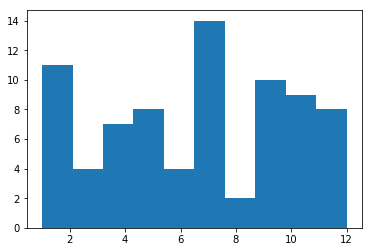

In [202]:
# fig = plt.figure(figsize=(5, 3))
plt.hist(greater_than_one_higher_detail['AccountingPeriod'])